In [1]:
import processor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import itables.interactive
from itables import show
from wordcloud import WordCloud

c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\prime\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


<IPython.core.display.Javascript object>

In [2]:
# To do:
# Documentation
# Class for files
# Export with Highlighter
# Word cloud
# Highligh words in Table
# Nicer HTML table
# Ipywidget for barplot and word cloud

In [3]:
root_name = 'doc'
extension_name = '.txt'
files_id = np.linspace(1,6,6)
path = './test docs/'
file_names = [path+root_name+str(int(x))+extension_name for x in files_id]
file_names

['./test docs/doc1.txt',
 './test docs/doc2.txt',
 './test docs/doc3.txt',
 './test docs/doc4.txt',
 './test docs/doc5.txt',
 './test docs/doc6.txt']

In [4]:
all_words = []
all_sentences = []
all_files = []
additional_stop_words = ['us', 'let', 'one', 'also', 'would', 'could', 'every']
for file in file_names:
    text = processor.file_reader(file)
    set_words, full_words, full_sentences = processor.text_processor(text, additional_stop_words, False, True)
    all_words = all_words + full_words
    all_sentences = all_sentences + full_sentences
    all_files = all_files + len(full_sentences)*[file]

In [5]:
all_set_words = list(set(all_words))

In [6]:
df = processor.data_frame_compiler(all_set_words, all_words, all_sentences, all_files)

In [7]:
df_temp = df[df['count']>15]
#df_temp.style.set_properties(subset=['sentences'], **{'width': '600px'})
print(df_temp.iloc[1].words)

people


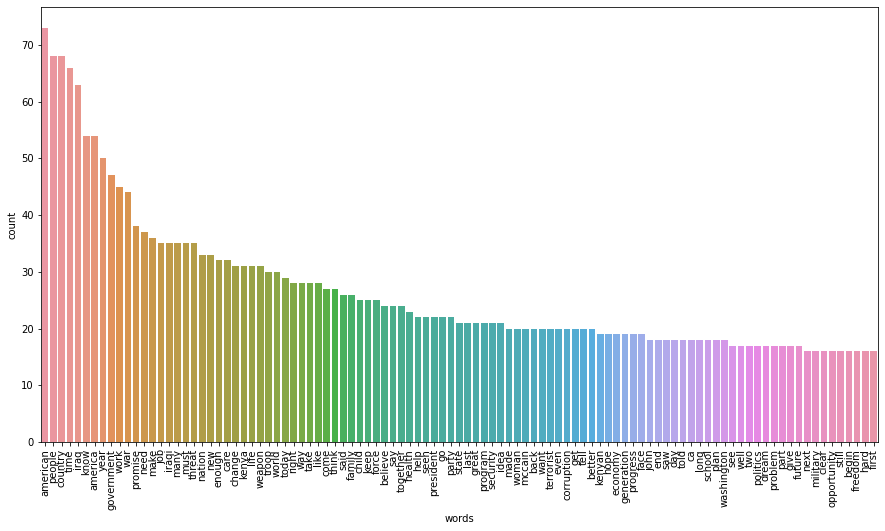

In [8]:
plt.figure(figsize=(15,8))
chart = sns.barplot(df_temp['words'], df_temp['count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [9]:
print(df_temp.head(10))

           words  count                                              files  \
1779    american     73  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
1708      people     68  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
1702     country     68  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
1658        time     66  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
450         iraq     63  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
756         know     54  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
1116     america     54  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
326         year     50  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
1005  government     47  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   
657         work     45  ./test docs/doc1.txt, ./test docs/doc2.txt, ./...   

                                              sentences  
1779  It was here, in Springfield, where North, Sout...  
1708  In the face of a po

In [10]:
processor.df_window(df_temp)

(-0.5, 399.5, 199.5, -0.5)

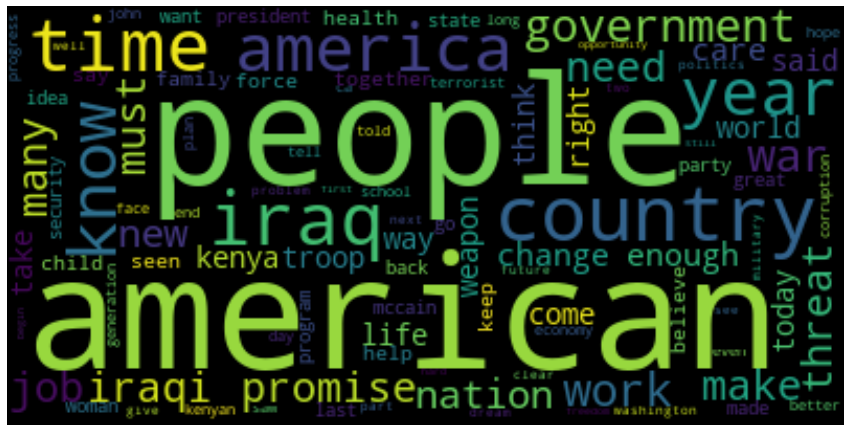

In [11]:
# Generate a word cloud image
wc_text = processor.words_for_cloud(df_temp)
wordcloud = WordCloud(collocations=False).generate(wc_text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")